In [0]:
from keras import backend as K
import time
import cv2
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


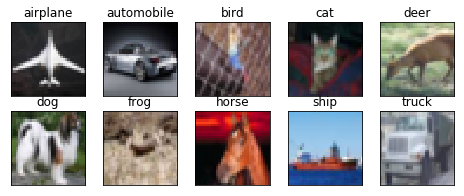

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

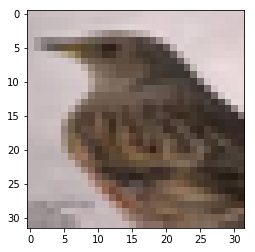

In [0]:
(plt.imshow(train_features[18]))

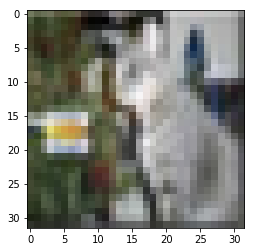

In [0]:
plt.imshow(train_features[78])

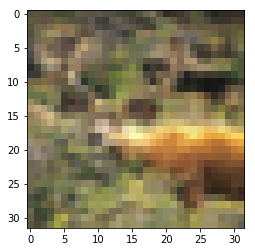

In [0]:
plt.imshow(train_features[98])

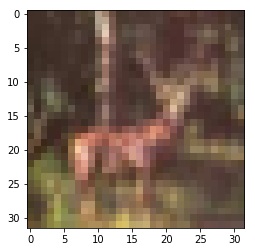

In [0]:
plt.imshow(train_features[2238])

In [0]:

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:

def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3)))#30,30,32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, 3))#28,28,64
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, 3))#26,26,128
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, 3))#24,24,
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))#13,13,128

model.add(Convolution2D(32, 1, 1, border_mode='same'))#13,13,32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, 3))#11,11,64
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, 3))#9,9,128
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 1, 1, border_mode='same'))#9,9,32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, 3))#7,7,64
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, border_mode='same'))#7,7,10
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))

model.add(Convolution2D(10, 7, 7))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0704 15:47:28.863142 140167884162944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0704 15:47:28.902865 140167884162944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0704 15:47:28.909109 140167884162944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0704 15:47:28.946013 140167884162944 deprecation_wrapper.py:119] From /usr/local/lib/python3.

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 64)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':
W0704 15:47:33.151994 140167884162944 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and wil

Epoch 1/100
390/390 [==============================] - 31s 80ms/step - loss: 1.6887 - acc: 0.3889 - val_loss: 1.6163 - val_acc: 0.4260
Epoch 2/100
390/390 [==============================] - 26s 66ms/step - loss: 1.2523 - acc: 0.5676 - val_loss: 1.2455 - val_acc: 0.5663
Epoch 3/100
390/390 [==============================] - 25s 65ms/step - loss: 1.0301 - acc: 0.6527 - val_loss: 1.1026 - val_acc: 0.6318
Epoch 4/100
390/390 [==============================] - 25s 64ms/step - loss: 0.8940 - acc: 0.6984 - val_loss: 1.0892 - val_acc: 0.6348
Epoch 5/100
390/390 [==============================] - 25s 65ms/step - loss: 0.8084 - acc: 0.7283 - val_loss: 0.8654 - val_acc: 0.7093
Epoch 6/100
390/390 [==============================] - 25s 65ms/step - loss: 0.7413 - acc: 0.7504 - val_loss: 1.0647 - val_acc: 0.6404
Epoch 7/100
390/390 [==============================] - 25s 65ms/step - loss: 0.6836 - acc: 0.7700 - val_loss: 1.0020 - val_acc: 0.6774
Epoch 8/100
390/390 [==============================] - 

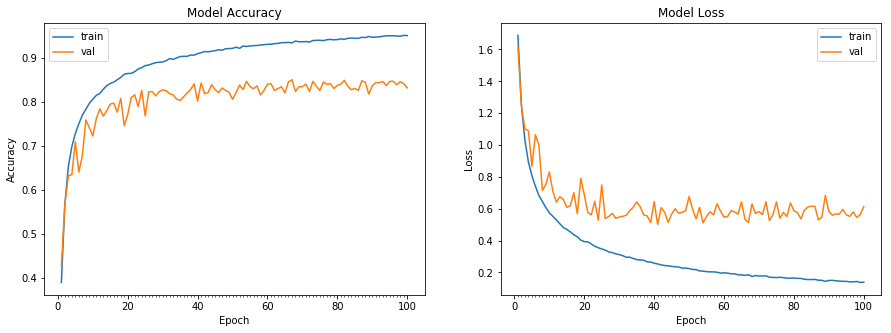

Accuracy on test data is: 83.23


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time() 
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

inital image shape (32, 32, 3)
after standardize (1, 32, 32, 3)


W0704 16:35:54.516298 140167884162944 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


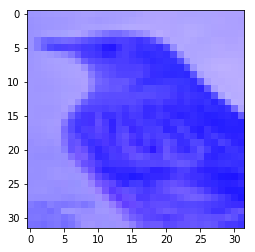

inital image shape (32, 32, 3)
after standardize (1, 32, 32, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
W0704 16:35:55.448115 140167884162944 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


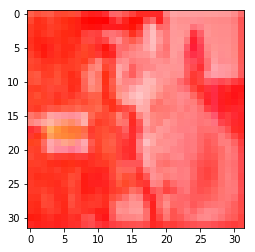

inital image shape (32, 32, 3)
after standardize (1, 32, 32, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
W0704 16:35:56.585556 140167884162944 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


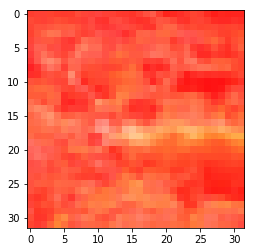

inital image shape (32, 32, 3)
after standardize (1, 32, 32, 3)


W0704 16:35:57.605759 140167884162944 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


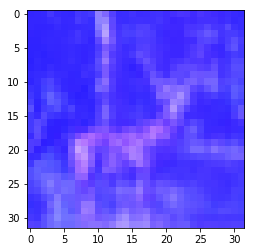

In [0]:
fig = plt.figure(figsize=(8,4))
idx=[18,78,98,2238]
selectedimages=[train_features[i] for i, _ in enumerate(train_features) if i in idx]
for img_path in selectedimages:
  print("inital image shape", img_path.shape)
  x=np.expand_dims(img_path, axis=0)
  x=datagen.standardize(x)
  print("after standardize", x.shape)
  preds=model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_11")
  #layer_output = model.get_layer('cifar10').get_layer('last layer').output
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  img = img_path
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.8, heatmap, 0.2,0,dtype=cv2.CV_32F)
  plt.imshow(img_path)
  plt.imshow(superimposed_img)
  plt.show()                                                           
                                                        

In [0]:
import pandas as pd 


def unpickle(file):
    with open(file, 'rb') as fo:
        dict1 = pickle.load(fo, encoding='bytes')
    return dict1
 
pd_tr = pd.DataFrame()
tr_y = pd.DataFrame()
 
for i in range(1,6):
    data = unpickle('data/data_batch_' + str(i))
    pd_tr = pd_tr.append(pd.DataFrame(data[b'data']))
    tr_y = tr_y.append(pd.DataFrame(data[b'labels']))
    pd_tr['labels'] = tr_y
 
tr_x = np.asarray(pd_tr.iloc[:, :3072])
tr_y = np.asarray(pd_tr['labels'])
ts_x = np.asarray(unpickle('data/test_batch')[b'data'])
ts_y = np.asarray(unpickle('data/test_batch')[b'labels'])    
labels = unpickle('data/batches.meta')[b'label_names']
 
def plot_CIFAR(ind):
    arr = tr_x[ind]
    R = arr[0:1024].reshape(32,32)/255.0
    G = arr[1024:2048].reshape(32,32)/255.0
    B = arr[2048:].reshape(32,32)/255.0
 
    img = np.dstack((R,G,B))
    title = re.sub('[!@#$b]', '', str(labels[tr_y[ind]]))
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(111)
    ax.imshow(img,interpolation='bicubic')
    ax.set_title('Category = '+ title,fontsize =15)
 
plot_CIFAR(4)


FileNotFoundError: ignored